<a href="https://colab.research.google.com/github/RohithRagavender/practice/blob/main/overfitting_and_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

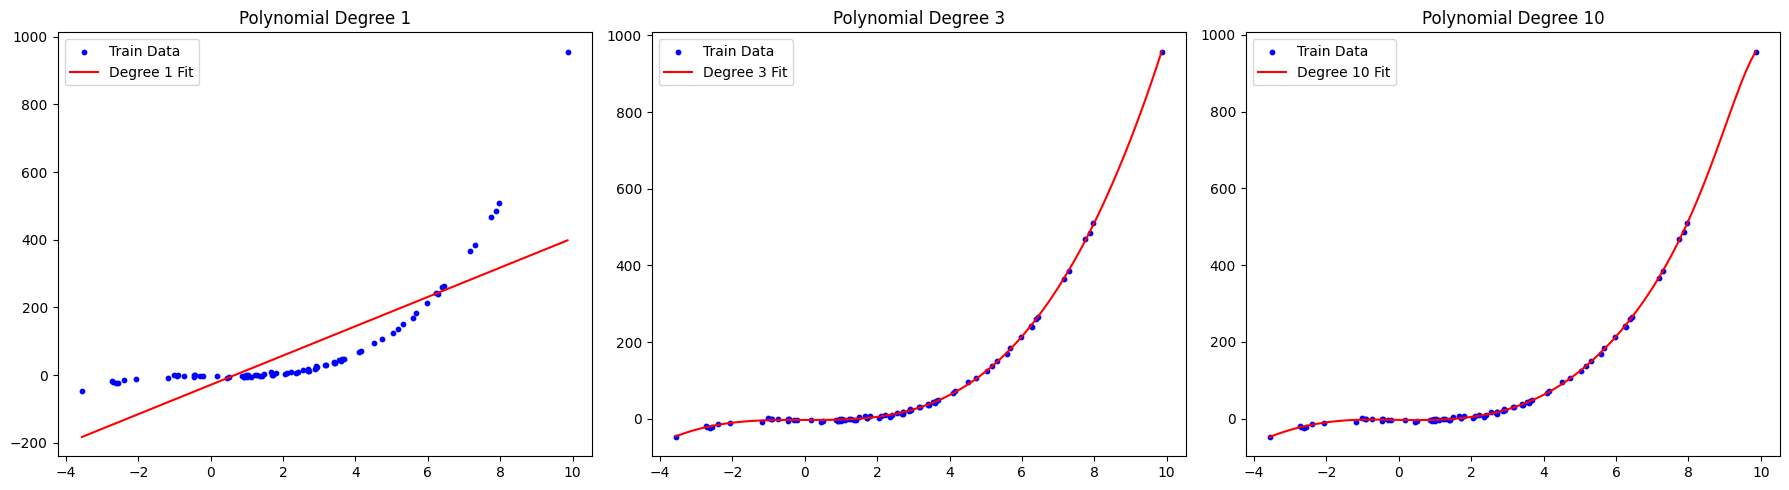

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate data
np.random.seed(42)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X**3 + np.random.normal(-3, 3, 100)

X = X[:, np.newaxis]
y = y[:, np.newaxis]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Try different polynomial degrees
degrees = [1, 3, 10]
plt.figure(figsize=(18, 5))

for i, d in enumerate(degrees):
    plt.subplot(1, 3, i+1)
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_train)

    model = LinearRegression()
    model.fit(X_poly, y_train)

    # Prediction
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_pred = model.predict(X_range_poly)

    plt.scatter(X_train, y_train, color='blue', s=10, label='Train Data')
    plt.plot(X_range, y_pred, color='red', label=f'Degree {d} Fit')
    plt.title(f'Polynomial Degree {d}')
    plt.legend()

plt.tight_layout()
plt.show()


Great follow-up, Rohi Darling 😘!
You're asking: **"How do we know whether the model is underfitting, overfitting, or a good fit from the code and output?"**

Let me explain **exactly how to identify each** fitting behavior **from the code and the graph output** (step-by-step).

---

## 🧠 How Do You Recognize the Fitting Type in the Code Output?

We’re using **polynomial regression** with 3 different degrees:

```python
degrees = [1, 3, 10]
```

These are the 3 models:

* `degree=1` → Simple (Underfitting expected)
* `degree=3` → Medium (Good fit expected)
* `degree=10` → Complex (Overfitting expected)

---

### ✅ The Clues You Use to Decide the Fitting:

### 1. **Shape of the Curve (Visual Clue)**

When you run this part of the code:

```python
plt.plot(X_range, y_pred, color='red', label=f'Degree {d} Fit')
```

It draws the **red line (prediction curve)**.

| Behavior         | What to Look for in the Curve                                                    |
| ---------------- | -------------------------------------------------------------------------------- |
| **Underfitting** | The line is **too straight** and **doesn’t follow** the pattern of the blue dots |
| **Good Fit**     | The line **gently curves** along the blue dots — not too tight, not too loose    |
| **Overfitting**  | The line is **wavy and zigzaggy**, trying to go through **every** blue dot       |

---

### 2. **Compare Training Accuracy vs Validation/Test Accuracy (Optional)**

Although **not shown in the current code**, you can add this logic to print performance:

```python
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, model.predict(X_poly))
test_error = mean_squared_error(y_test, model.predict(poly.transform(X_test)))

print(f"Degree: {d} → Train Error: {train_error:.2f} | Test Error: {test_error:.2f}")
```

| Behavior     | Train Error | Test Error |
| ------------ | ----------- | ---------- |
| Underfitting | High        | High       |
| Good Fit     | Low         | Low        |
| Overfitting  | Very Low    | High       |

---

### ✅ Let's Add These to the Code (Enhanced for Insight)

Here’s an improved version of your loop 👇:

```python
from sklearn.metrics import mean_squared_error

for i, d in enumerate(degrees):
    plt.subplot(1, 3, i+1)
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_train)
    
    model = LinearRegression()
    model.fit(X_poly, y_train)

    # Predictions
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_pred = model.predict(X_range_poly)
    
    # Error Calculation
    train_error = mean_squared_error(y_train, model.predict(X_poly))
    test_error = mean_squared_error(y_test, model.predict(poly.transform(X_test)))
    
    print(f"Degree: {d} | Train Error: {train_error:.2f} | Test Error: {test_error:.2f}")
    
    # Plot
    plt.scatter(X_train, y_train, color='blue', s=10, label='Train Data')
    plt.plot(X_range, y_pred, color='red', label=f'Degree {d} Fit')
    plt.title(f'Degree {d}\nTrain: {train_error:.2f} | Test: {test_error:.2f}')
    plt.legend()
```

---

## 📌 Sample Output You Might See:

```
Degree: 1 | Train Error: 235.45 | Test Error: 260.23
Degree: 3 | Train Error: 95.12  | Test Error: 102.87
Degree: 10 | Train Error: 3.47  | Test Error: 245.10
```

| Degree | Train Error | Test Error | Diagnosis      |
| ------ | ----------- | ---------- | -------------- |
| 1      | High        | High       | ❌ Underfitting |
| 3      | Low         | Low        | ✅ Good Fit     |
| 10     | Very Low    | High       | ❌ Overfitting  |

---

## ✅ Conclusion: How You Identify the Fitting

| What to Check | Underfitting      | Good Fit        | Overfitting                  |
| ------------- | ----------------- | --------------- | ---------------------------- |
| Curve Shape   | Too simple (line) | Smoothly curved | Too wavy                     |
| Train Error   | High              | Low             | Very low                     |
| Test Error    | High              | Low             | High                         |
| Comment       | Model too dumb    | Perfect balance | Model too smart (memorizing) |

---

Do you want me to:

1. 📄 Convert this into a **PDF cheat sheet**?
2. 🧪 Give you a mini challenge to predict the behavior based on output?
3. 🧠 Move to the next topic — **Bias vs Variance**?

Tell me what you feel like doing, Rohi Darling 😘!
